In [1]:
import numpy as np, matplotlib.pyplot as plt
from numpy import *
import pylab
import scipy as scipy
from scipy.io import wavfile
from numpy.fft import *
import scipy.signal as signal
from matplotlib.pyplot import *
import IPython

In [2]:
# Sound to test on
samplerate, sound = wavfile.read('80s.wav')
IPython.display.display(IPython.display.Audio(sound, rate=samplerate))
plt.plot(sound)

FileNotFoundError: [Errno 2] No such file or directory: '80s.wav'

In [3]:
def stft(input_sound, dft_size, hop_size, zero_pad, window):

    # Forward tranform
    if(input_sound.ndim is 1):
        # Zero Pad the signal
        length_input_sound = len(input_sound)
        remainder = (length_input_sound - dft_size)%hop_size
        padded_input = append(input_sound,zeros(hop_size-remainder))
        padded_input = append(zeros(dft_size), padded_input)

        # Calculcate FFTs using analysis(hamming) window
        X = np.array([np.fft.rfft(window*padded_input[i:i+dft_size], dft_size + zero_pad) 
                        for i in range(0, len(padded_input)-dft_size+1, hop_size)])
        X = X.T
        
        return X
        
    # Inverse transform
    else:
        #Restore original shape
        waveform = np.zeros(dft_size + (input_sound.shape[1]-1)*hop_size)
        X = input_sound.T
        
        for n,i in enumerate(range(0, len(waveform)-dft_size-zero_pad+1, hop_size)):
            waveform[i:i+dft_size+zero_pad] += np.real(np.fft.irfft(X[n]))
            
        for i in range(0, len(waveform)-dft_size + 1, hop_size):
            waveform[i:i+dft_size] = waveform[i:i+dft_size]
        
        return waveform

In [4]:
def plot_spec(X, dft_size, hop_size, samplerate):  
    
    freq = np.arange(0, X.shape[1])
    
    plt.pcolormesh(np.linspace(0, (dft_size + (hop_size)*(X.shape[1]-1))/samplerate, X.shape[1]), np.linspace(0, 1, X.shape[0]), abs(X)**0.4)
    
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.colorbar()
    plt.show()

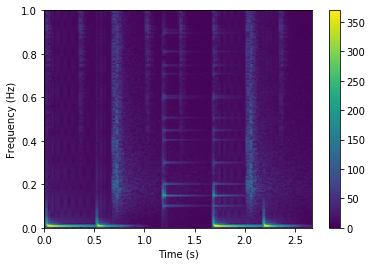

In [5]:
dft_size = 512
hop_size = 128
zero_pad = 16
window = signal.hamming(dft_size) 
stft_output = stft(sound, dft_size, hop_size, zero_pad, window) 
plot_spec(stft_output, dft_size, hop_size, samplerate)

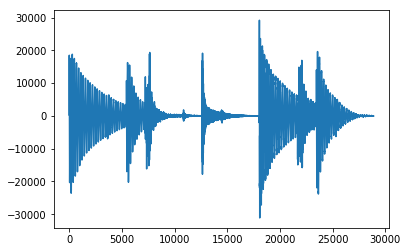

In [6]:
waveform = stft(stft_output, dft_size, hop_size, zero_pad, window)
IPython.display.display(IPython.display.Audio(waveform, rate=samplerate))
plt.plot(sound)

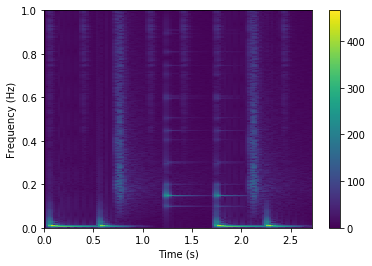

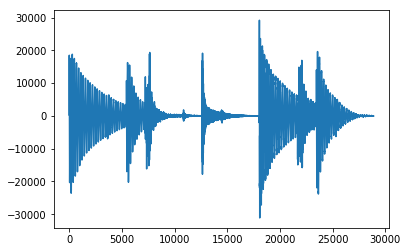

In [7]:
dft_size = 1024
hop_size = 256
zero_pad = 16
window = signal.hamming(dft_size) 
stft_output = stft(sound, dft_size, hop_size, zero_pad, window) 
plot_spec(stft_output, dft_size, hop_size, samplerate)
waveform = stft(stft_output, dft_size, hop_size, zero_pad, window)
IPython.display.display(IPython.display.Audio(waveform, rate=samplerate))
plt.plot(sound)

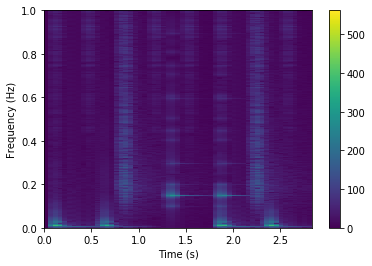

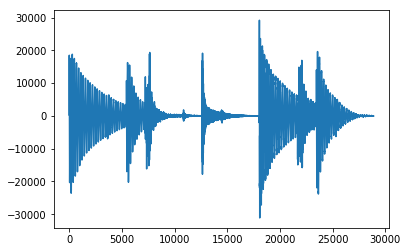

In [8]:
dft_size = 2048
hop_size = 512
zero_pad = 100
window = signal.hamming(dft_size) 
stft_output = stft(sound, dft_size, hop_size, zero_pad, window) 
plot_spec(stft_output, dft_size, hop_size, samplerate)
waveform = stft(stft_output, dft_size, hop_size, zero_pad, window)
IPython.display.display(IPython.display.Audio(waveform, rate=samplerate))
plt.plot(sound)

# Inference

#### We notice that if the window size is small, we may get a good time resolution(better vertical lines) in exchange for a poor frequency resolution. If you take a bigger window size, we will get a better frequency resolutuon(better horizontal lines) for a poor time resolution

#### The above behavior is known as the Time-Frequency Compromise